### Importing and Configuring

In [8]:
import math
import pandas as pd
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.table as tab
import matplotlib.transforms as trans
from matplotlib.text import OffsetFrom
from matplotlib.font_manager import FontProperties
import matplotlib.ticker as mticker
import seaborn as sns
import os
import warnings
from scipy import stats
import pingouin as pg
from mystats import statistics, ConfidencePlotter
import sys
from plotter.HeatMapPlotter import HeatMapPlotter 
from plotter.SpacePlotter import SpacePlotter 
from plotter.SignalPlotter import SignalPlotter 
from anytree import Node, RenderTree, search

# Get the current working directory
cwd = os.getcwd()
img_directory = 'img'
path_img_directory = os.path.join(cwd, img_directory)
filename_head = 'study1'
filename_extension = 'jpg'
figure_dpi = 300
# Ignore all warning for clean output
#warnings.simplefilter("ignore")
# create utility functions
def title(msg):
    display(HTML("<h1>%s</h1>" %msg))
def info(msg):
    display(HTML('<span style="color:black;background-color:white"><b> INFO </b></span>&emsp;%s' %msg))
def debug(msg):
    display(HTML('<span style="color:white;background-color:blue"><b> DEBUG </b></span>&emsp;%s' %msg))
def success(msg):
    display(HTML('<span style="color:white;background-color:green"><b> SUCCESS </b></span>&emsp;%s' %msg))
def warn(msg):
    display(HTML('<span style="color:white;background-color:orange"><b> WARNING </b></span>&emsp;%s' %msg))
def err(msg):
    display(HTML('<span style="color:white;background-color:red"><b> ERROR </b></span>&emsp;%s' %msg))
    

### Fetching and Filtering dataframe
Organization of the directory:
- data
    - Forms
        - all
            - demography.xlsx


In [9]:
# Define constants
data_directory = 'data'
form_directory = 'Forms/all'
stress_filename = "stress-and-safety.xlsx"

# Define names of the column headers
form_columns = ['session0', 'session1', 'session2', 'session3']
header_names = ['DATE', 'NOT_STRESSED⇔MAX_STRESSED', 'NERVOUS⇔RELAXED', 'CALM⇔AGITATED', 'SERENE⇔SURPRISED', 'SLOW⇔FAST', 'RIGID⇔FLUID', 'CALM⇔BRUTAL', 'PREDICTABLE⇔SURPRISING', 'SYNCHRONOUS⇔ASYNCHRONOUS']
df_qual = pd.read_excel(os.path.join(data_directory,form_directory, stress_filename ), names=header_names)

sequence_filename = 'sequence.xlsx'
df_seq = pd.read_excel(sequence_filename, index_col=0)
participants_indexes = []
tasks_indexes = []
modalities_indexes = []

for index, row in df_qual.iterrows():
    session_index = int(index % 4)
    participant_index = int(index / 4)
    #print("%s:%s" %(participant_index, session_index))
    sequence_tag = df_seq.iloc[participant_index][session_index]
    task = sequence_tag.split('-')[0]
    modality = sequence_tag.split('-')[1]
    participants_indexes.append(participant_index)
    tasks_indexes.append(task)
    modalities_indexes.append(modality)
df_qual.insert(1, "Modality", modalities_indexes)
df_qual.insert(1, "Task", tasks_indexes)
df_qual.insert(1, "Participant", participants_indexes)
display(df_qual)



,DATE,Participant,Task,Modality,NOT_STRESSED⇔MAX_STRESSED,NERVOUS⇔RELAXED,CALM⇔AGITATED,SERENE⇔SURPRISED,SLOW⇔FAST,RIGID⇔FLUID,CALM⇔BRUTAL,PREDICTABLE⇔SURPRISING,SYNCHRONOUS⇔ASYNCHRONOUS
0,2021-09-30 15:28:39.311,0,USER,SMS,2,4,1,3,1,3,2,2,1
1,2021-09-30 15:38:54.295,0,USER,SSM,3,4,2,3,5,4,4,2,5
2,2021-09-30 15:49:56.822,0,SYSTEM,SMS,1,3,2,4,4,4,3,2,1
3,2021-09-30 15:59:49.552,0,SYSTEM,SSM,1,4,2,2,4,4,3,2,5
4,2021-10-06 14:28:32.241,1,SYSTEM,SMS,4,2,4,5,3,5,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2021-10-19 16:01:45.485,14,SYSTEM,SMS,2,4,2,1,5,4,4,2,1
60,2021-10-19 16:41:04.546,15,SYSTEM,SMS,2,5,1,1,3,4,1,3,1
61,2021-10-19 16:52:34.916,15,SYSTEM,SSM,1,5,1,1,4,4,3,2,4
62,2021-10-19 17:04:12.383,15,USER,SSM,1,5,1,1,4,3,3,2,5


### Performing and Plotting Descriptive Statistics

,factor0,variable
0,USER,1.0
1,USER,1.0
2,SYSTEM,0.0
3,SYSTEM,1.0
4,SYSTEM,-1.0
...,...,...
59,SYSTEM,1.0
60,SYSTEM,2.0
61,SYSTEM,2.0
62,USER,2.0


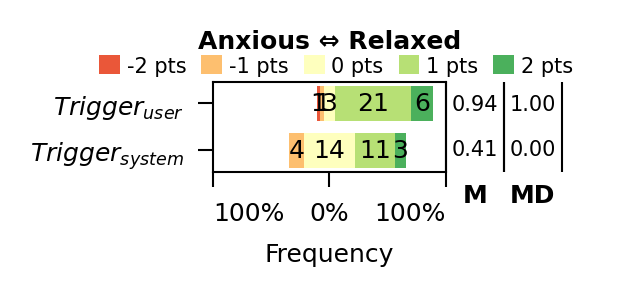

,SYSTEM,USER
count,64.000,64.000
mean,0.203,0.469
median,0.000,0.000
mode,0.000,0.000


,Comparison,N,Test,Statistic,pValue,effectSize
0,SYSTEM|USER,64,Wilcoxon,398.0,0.062,-0.294


,factor0,variable
0,USER,2.0
1,USER,1.0
2,SYSTEM,1.0
3,SYSTEM,1.0
4,SYSTEM,-1.0
...,...,...
59,SYSTEM,1.0
60,SYSTEM,2.0
61,SYSTEM,2.0
62,USER,2.0


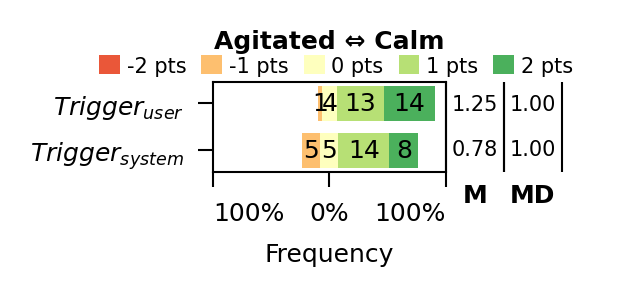

,SYSTEM,USER
count,64.000,64.000
mean,0.391,0.625
median,0.000,0.000
mode,0.000,0.000


,Comparison,N,Test,Statistic,pValue,effectSize
0,SYSTEM|USER,64,Wilcoxon,611.0,0.169,-0.206


,factor0,variable
0,USER,0.0
1,USER,0.0
2,SYSTEM,-1.0
3,SYSTEM,1.0
4,SYSTEM,-2.0
...,...,...
59,SYSTEM,2.0
60,SYSTEM,2.0
61,SYSTEM,2.0
62,USER,2.0


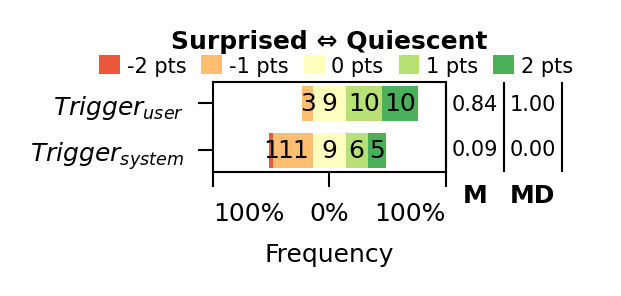

,SYSTEM,USER
count,64.000,64.000
mean,0.047,0.422
median,0.000,0.000
mode,0.000,0.000


,Comparison,N,Test,Statistic,pValue,effectSize
0,SYSTEM|USER,64,Wilcoxon,332.0,0.018,-0.386


,factor0,factor1,variable
0,USER,SMS,1.0
1,USER,SSM,1.0
2,SYSTEM,SMS,0.0
3,SYSTEM,SSM,1.0
4,SYSTEM,SMS,-1.0
...,...,...,...
59,SYSTEM,SMS,1.0
60,SYSTEM,SMS,2.0
61,SYSTEM,SSM,2.0
62,USER,SSM,2.0


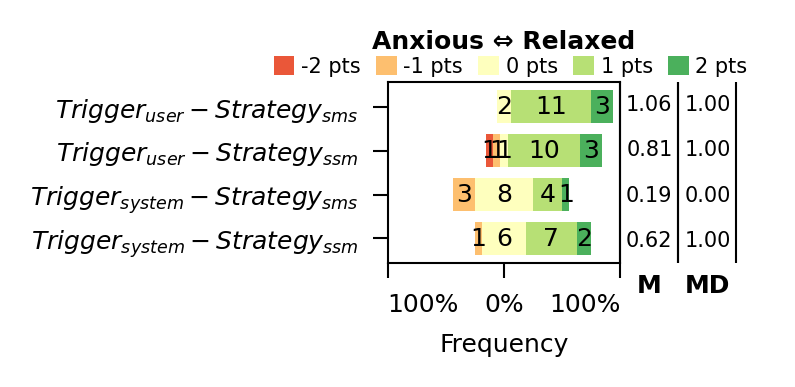

,SYSTEM-SMS,SYSTEM-SSM,USER-SMS,USER-SSM
count,64.000,64.000,64.000,64.000
mean,0.047,0.156,0.266,0.203
median,0.000,0.000,0.000,0.000
mode,0.000,0.000,0.000,0.000


,Comparison,N,Test,Statistic,pValue,effectSize
0,SYSTEM-SMS | SYSTEM-SSM | USER-SMS | USER-SSM,64,Friedman,6.702,0.082,0.035
1,SYSTEM-SMS|SYSTEM-SSM,64,Wilcoxon,57.000,0.761,-0.333
2,SYSTEM-SMS|USER-SMS,64,Wilcoxon,58.500,0.075,-0.538
3,SYSTEM-SSM|USER-SSM,64,Wilcoxon,147.500,1.000,-0.092
4,USER-SMS|USER-SSM,64,Wilcoxon,193.000,1.000,0.113


,factor0,factor1,variable
0,USER,SMS,2.0
1,USER,SSM,1.0
2,SYSTEM,SMS,1.0
3,SYSTEM,SSM,1.0
4,SYSTEM,SMS,-1.0
...,...,...,...
59,SYSTEM,SMS,1.0
60,SYSTEM,SMS,2.0
61,SYSTEM,SSM,2.0
62,USER,SSM,2.0


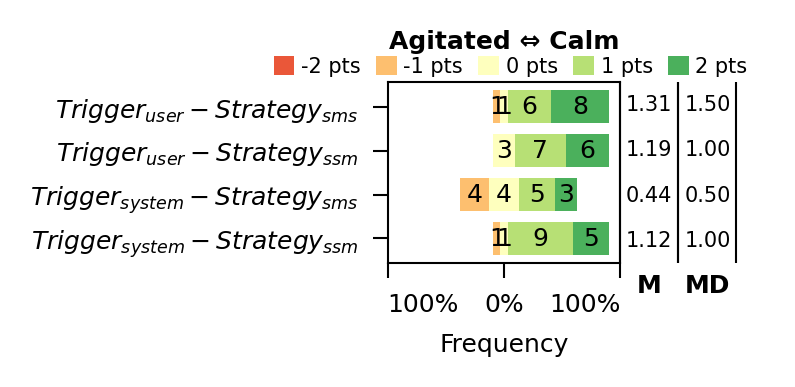

,SYSTEM-SMS,SYSTEM-SSM,USER-SMS,USER-SSM
count,64.000,64.000,64.000,64.000
mean,0.109,0.281,0.328,0.297
median,0.000,0.000,0.000,0.000
mode,0.000,0.000,0.000,0.000


,Comparison,N,Test,Statistic,pValue,effectSize
0,SYSTEM-SMS | SYSTEM-SSM | USER-SMS | USER-SSM,64,Friedman,4.418,0.220,0.023
1,SYSTEM-SMS|SYSTEM-SSM,64,Wilcoxon,130.500,0.578,-0.310
2,SYSTEM-SMS|USER-SMS,64,Wilcoxon,117.000,0.303,-0.381
3,SYSTEM-SSM|USER-SSM,64,Wilcoxon,196.000,1.000,-0.034
4,USER-SMS|USER-SSM,64,Wilcoxon,189.000,1.000,0.069


,factor0,factor1,variable
0,USER,SMS,0.0
1,USER,SSM,0.0
2,SYSTEM,SMS,-1.0
3,SYSTEM,SSM,1.0
4,SYSTEM,SMS,-2.0
...,...,...,...
59,SYSTEM,SMS,2.0
60,SYSTEM,SMS,2.0
61,SYSTEM,SSM,2.0
62,USER,SSM,2.0


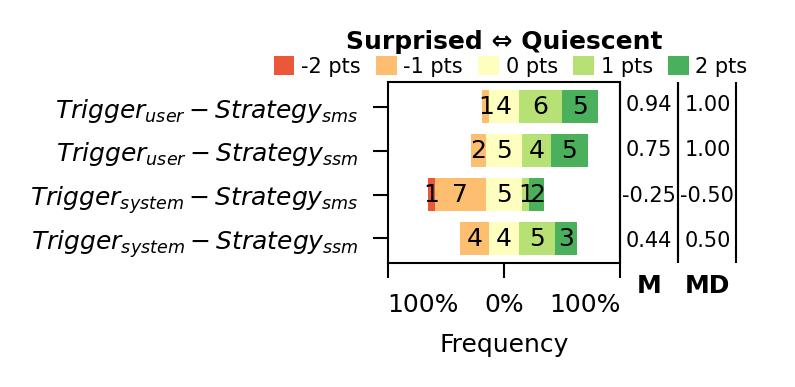

,SYSTEM-SMS,SYSTEM-SSM,USER-SMS,USER-SSM
count,64.000,64.000,64.000,64.000
mean,-0.062,0.109,0.234,0.188
median,0.000,0.000,0.000,0.000
mode,0.000,0.000,0.000,0.000


,Comparison,N,Test,Statistic,pValue,effectSize
0,SYSTEM-SMS | SYSTEM-SSM | USER-SMS | USER-SSM,64,Friedman,10.957,0.012,0.057
1,SYSTEM-SMS|SYSTEM-SSM,64,Wilcoxon,86.000,0.396,-0.377
2,SYSTEM-SMS|USER-SMS,64,Wilcoxon,55.000,0.036,-0.601
3,SYSTEM-SSM|USER-SSM,64,Wilcoxon,114.500,1.000,-0.170
4,USER-SMS|USER-SSM,64,Wilcoxon,127.500,1.000,0.076


In [25]:
from cmath import nan
from IPython.display import display, HTML

factor_names_list = [ ['Task'], ['Task', 'Modality']] 
variable_name_list = [ 'NERVOUS⇔RELAXED', 'CALM⇔AGITATED', 'SERENE⇔SURPRISED']
variable_range_list = [(1,5), (1,5), (1,5)]
variable_legend_hide_list = [False, False, False]
variable_reverse_list = [False, True, True]
new_variable_name_list = [ 'Anxious ⇔ Relaxed', 'Agitated ⇔ Calm', 'Surprised ⇔ Quiescent']
new_variable_range_list = [(-2,2), (-2,2), (-2,2)]
desc_stats_of_interest = ['count', 'mean', 'median', 'mode']

values_to_labels_map = {
    'Task':{
        'values':['SYSTEM', 'USER'],
        'labels':['Trigger_{system}', 'Trigger_{user}'],
        },
    'Modality':{
        'values':['SSM', 'SMS'],
        'labels':['Strategy_{ssm}', 'Strategy_{sms}'],
        }
}


def plotOrdinal(
    df_qual,
    figure_dpi = 300,
    legend_hide = False,
    table_head_height = 1,
    table_row_height = 1,
    table_column_width = 1,
    table_head_size = 5,
    table_cell_size = 4,
    factor_columns = [], # factor0
    factor_names = [], # stress
    factor_values_to_labels = [], 
    variable_column = None,
    variable_label = None,
    variable_lim = (0,5),
    ) -> plt.Figure:
    # fetch variable dataframe
    df_variable = df_qual.loc[::, [*factor_columns, variable_column]]
    nb_participants = df_variable.shape[0]
    display(df_variable)
    x_min = -100
    x_max = 100
    x_range = x_max - x_min
    # create figure
    offset_fraction = 0.5
    axis_label_size = 6
    fig_title_size = 6
    fig_title_pad = 8
    fig_legend_size = 5
    axis_line_width = 0.5
    annotation_label_size = 5
    table_data = [["M", "MD"]]
    height=0.75
    var_min = variable_lim[0]
    var_max = variable_lim[1]
    var_range = var_max - var_min
    var_range_list = range(var_min, var_max + 1)
    nb_column = var_range + 1
    column_indexes = np.arange(nb_column)    # the x locations for the groups
    color_range = sns.color_palette("RdYlGn", nb_column)
    nb_rows = 1
    for factor_name in factor_names:
        nb_rows *= len(factor_values_to_labels[factor_name]['values'])
    # Generate figure
    figure_width = len(var_range_list)/5
    figure_height = nb_rows/5
    figure_size = (figure_width, figure_height)
    fig = plt.figure(figsize=figure_size, dpi=figure_dpi) 
    ax = plt.axes()

    row_indexes = np.arange(nb_rows)    # the x locations for the groups
    row_labels = []
    # getting middle position
    xMidPos = 0
    data = {}
    for index in range(nb_column):
        data[index] = {'x':[], 'y':[],  'label':[], 'count':[], 'width':[], 'height':[], 'left':[], 'color':[], 'edgecolor':[]}
    
    # Generate multifactor tree
    root_node = Node("Factor")
    nodes = [root_node]
    def nextNode(parent_node, next_factor_index):
        if next_factor_index < len(factor_names):
            factor_name = factor_names[next_factor_index]
            factor_values = factor_values_to_labels[factor_name]['values']
            for factor_value in factor_values:
                value_node = Node(factor_value, parent=parent_node)
                nextNode(value_node, next_factor_index + 1)
    nextNode(root_node, 0)
    # Iterate over multifactor leafs
    row_index = 0
    for multifactor_node in search.findall(root_node, filter_=lambda node: node.depth == len(factor_names)):
        multifactor_values = []
        for factor_node in multifactor_node.iter_path_reverse():
            multifactor_values.append(factor_node.name)
        multifactor_values.reverse()
        multifactor_values = multifactor_values[1::]
        #display(multifactor_values)
         # fetch Factor x Task
        multifactor_conditions = []
        for multifactor_index, multifactor_value in enumerate(multifactor_values):
            if isinstance(multifactor_value, str):
                multifactor_conditions.append("(df_variable['factor%s'] == '%s')" %(multifactor_index, multifactor_value))
            else:
                multifactor_conditions.append("(df_variable['factor%s'] == %s)" %(multifactor_index, multifactor_value))
        multifactor_conditions = ' & '.join(multifactor_conditions)
        #print(multifactor_conditions)
        df_multifactor = df_variable.loc[pd.eval(multifactor_conditions, target=df_variable), ::]
        multifactor_columns = ['factor%s' %i for i in range(len(multifactor_values))]
        df_multifactor_hist = df_multifactor[variable_column].value_counts()
        for i in np.arange(var_min, var_max+1, 1.0):
            missing = True
            for j in df_multifactor_hist.index.values:
                if abs(j - i) < 0.01:
                    missing = False
            if missing:
                df_multifactor_hist.loc[i] = 0
        df_multifactor_hist.sort_index(ascending=True, inplace=True)
        df_multifactor_percent = df_multifactor_hist/df_multifactor_hist.sum() * 100
        # generate row label
        row_name = []
        for multifactor_index, multifactor_value in enumerate(multifactor_values):
            factor_name = factor_names[multifactor_index]
            factor_map = values_to_labels_map[factor_name]
            factor_value_index = factor_map['values'].index(multifactor_value)
            row_name.append(factor_map['labels'][factor_value_index])
        columnName = r"${0}$".format('-'.join(row_name))
        row_labels.append(columnName)
        # compute stats
        variable_mean = df_multifactor[variable_column].mean()
        variable_median = df_multifactor[variable_column].median()
        table_data.append(['%0.2f' %variable_mean, '%0.2f' %variable_median])
        if nb_column % 2: # unpaired
            midIndex = int(nb_column/2)
            leftMidPos = xMidPos - df_multifactor_percent.iloc[midIndex]/2
            data[midIndex]['label'].append(columnName)
            data[midIndex]['width'].append(df_multifactor_percent.iloc[midIndex])
            data[midIndex]['count'].append(df_multifactor_hist.iloc[midIndex])
            data[midIndex]['left'].append(leftMidPos)
            data[midIndex]['color'].append(color_range[midIndex])
            data[midIndex]['y'].append(row_index)
            data[midIndex]['x'].append(leftMidPos + df_multifactor_percent.iloc[midIndex]/2)

            for j in range(midIndex-1, -1, -1):
                leftLeftPos = leftMidPos - df_multifactor_percent.iloc[j:midIndex].sum()
                data[j]['label'].append(columnName)
                data[j]['width'].append(df_multifactor_percent.iloc[j])
                data[j]['count'].append(df_multifactor_hist.iloc[j])
                data[j]['left'].append(leftLeftPos)
                data[j]['color'].append(color_range[j])
                data[j]['y'].append(row_index)
                data[j]['x'].append(leftLeftPos + df_multifactor_percent.iloc[j]/2)

            for j in range(midIndex+1, len(df_multifactor_percent.index.values), +1):
                leftRightPos = leftMidPos + df_multifactor_percent.iloc[midIndex:j].sum()
                data[j]['label'].append(columnName)
                data[j]['width'].append(df_multifactor_percent.iloc[j])
                data[j]['count'].append(df_multifactor_hist.iloc[j])
                data[j]['left'].append(leftRightPos)
                data[j]['color'].append(color_range[j])
                data[j]['y'].append(row_index)
                data[j]['x'].append(leftRightPos + df_multifactor_percent.iloc[j]/2)


        else: # paired
            midIndex = int(nb_column/2)
            for j in range(midIndex-1, -1, -1):
                leftLeftPos = xMidPos - df_multifactor_percent.iloc[j:midIndex].sum()
                data[j]['label'].append(columnName)
                data[j]['width'].append(df_multifactor_percent.iloc[j])
                data[j]['count'].append(df_multifactor_hist.iloc[j])
                data[j]['left'].append(leftLeftPos)
                data[j]['color'].append(color_range[j])
                data[j]['y'].append(row_index)
                data[j]['x'].append(leftLeftPos + df_multifactor_percent.iloc[j]/2)

            for j in range(midIndex, len(df_multifactor_percent.index.values), +1):
                leftRightPos = xMidPos + df_multifactor_percent.iloc[midIndex:j].sum()
                data[j]['label'].append(columnName)
                data[j]['width'].append(df_multifactor_percent.iloc[j])
                data[j]['count'].append(df_multifactor_hist.iloc[j])
                data[j]['left'].append(leftRightPos)
                data[j]['color'].append(color_range[j])
                data[j]['y'].append(row_index)
                data[j]['x'].append(leftRightPos + df_multifactor_percent.iloc[j]/2)
    #     ax.text(
    #         x = x_min - offset_fraction * x_range, 
    #         y = (len(factor2_columns) - 1)/2 + task_index * len(factor2_columns),
    #         ha = 'center',
    #         va = 'center',
    #         s = r"${0}$".format(factor1_labels[task_index]),
    #         fontsize=axis_label_size
    #     )
        row_index += 1
    for key, value in data.items():
        ax.barh(y=value['label'], width=value['width'], height=height, left=value['left'], color=value['color'])
        for x, y, v, c in zip(value['x'], value['y'], value['count'], value['color']):
            if int(v):
                ax.text(x, y, int(v), ha='center', va='center',  size=6, color='black')
    if not legend_hide:
        leg = ax.legend(
            labels=['%s pts' % var_range_list[key] for key in data],
            loc='center',
            frameon=False,
            bbox_to_anchor=(0.55, 1.0 + (0.35/nb_rows) * 1.0),
            fancybox=False, 
            shadow=False, 
            fontsize=fig_legend_size, 
            #borderpad=0,
            labelspacing=0,
            columnspacing=0.25,
            handlelength=1,
            handleheight=1,
            ncol=len(data)
            )
        for txt in  leg.get_texts():
            txt.set_ha("left") # horizontal alignment of text item
            txt.set_x(-10) # x-position
            #txt.set_y(10) # y-position

    ax.set_xlabel('Frequency', size=axis_label_size)
    ax.set_yticks(row_indexes)
    ax.set_yticklabels(row_labels)
    ax.set_xlim([x_min, x_max])
    vals = ax.get_xticks()
    
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels([ str(int(abs(x))) + '%' for x in vals])
    # Get ticklabels for fixed ticks
    ax_xticklabels = ax.get_xticklabels()
    # set the alignment for outer ticklabels
    ax_xticklabels[0].set_ha("left")
    ax_xticklabels[-1].set_ha("right")
    ax.tick_params(axis='y', labelsize=axis_label_size)
    ax.tick_params(axis='x', labelsize=axis_label_size)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)

    # change axes and ticks width
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(axis_line_width)
    ax.xaxis.set_tick_params(width=axis_line_width)
    ax.yaxis.set_tick_params(width=axis_line_width)
    # draw table
    axis_line_width = 0.5
    axes_table = tab.Table(
        ax,
        bbox = [1.00, -1.0/nb_rows, 0.5, 1.0 + 1.0/nb_rows] #table_bbox
        #loc=trans.Bbox([[0, 1], [1, 7]]) #trans.Bbox.from_extents(x_max, y_max, 3, 7)
        )
    axes_table.auto_set_font_size(False)
    axes_table.auto_set_font_size(False)
    visible_edges_value = "open" #"RLTB"
    nb_row = len(table_data)
    nb_col = len(table_data[0])
    for row_index, row_values in enumerate(table_data):
            for col_index, col_value in enumerate(row_values):
                col_width = table_column_width #len(table_data[0][col_index])
                if row_index == 0:
                        cell = axes_table.add_cell(
                            row= (nb_row - 1) - row_index,
                            col= col_index, 
                            width=col_width,
                            height=table_head_height,
                            edgecolor='k',
                            facecolor='w',
                            fill=False,
                            text=col_value,
                            loc='center',
                            fontproperties=FontProperties(size=table_head_size, style="normal", weight="bold")
                        )
                        # if col_index == 0:
                        #     cell.visible_edges = "LTB"
                        # if col_index == nb_col - 1:
                        #     cell.visible_edges = "RTB"
                        cell.visible_edges = "open"
                        cell.set(linewidth=axis_line_width)
                else:
                    cell = axes_table.add_cell(
                            row= (nb_row - 1) - row_index,
                            col=col_index, 
                            width=col_width,
                            height=table_row_height,
                            edgecolor='k',
                            facecolor='w',
                            fill=False,
                            text=col_value,
                            loc='center',
                            fontproperties=FontProperties(size=table_cell_size)
                        )
                    # if col_index == 0:
                    #     cell.visible_edges = "LTB"
                    # if col_index == nb_col - 1:
                    #     cell.visible_edges = "RTB"
                    cell.visible_edges = "LR" #visible_edges_value
                    cell.set(linewidth=axis_line_width)

    ax.add_table(axes_table)
    plt.title(variable_label, fontsize=fig_title_size, pad=fig_title_pad, fontweight='bold')
    plt.show()
    return fig


for factor_names in factor_names_list:
    for variable_index, variable_name in enumerate(variable_name_list):
        # generate a title
        variable_title = '[%s] %s' %(' x '.join(factor_names), new_variable_name_list[variable_index])
        title(variable_title)
        # fetch useful information
        variable_reverse = variable_reverse_list[variable_index]
        new_variable_name = new_variable_name_list[variable_index]
        (var_min, var_max) = variable_range_list[variable_index]
        (new_var_min, new_var_max) = new_variable_range_list[variable_index]
        # scoping of global dataframe
        df_var = df_qual.loc[::,factor_names + [variable_name]].reset_index()
        #display(df_var)
        # centering values and inversing them
        var_length = var_max - var_min
        new_var_length = new_var_max - new_var_min
        df_var_coeff =  1 - ((var_max - df_var.loc[:, variable_name])/var_length)
        df_var.loc[:, variable_name] = new_var_min + df_var_coeff * new_var_length
        if variable_reverse:
            df_var.loc[:, variable_name] = new_var_min + (1 - df_var_coeff) * new_var_length
        #print("%s => %s" %(' x '.join(factor_names), variable_name))
        # renaming columns 
        df_var_columns = {}
        for factor_index, factor_name in enumerate(factor_names):
            df_var_columns[factor_name] = "factor%s" % factor_index
        df_var_columns[variable_name] = "variable"
        df_var.rename(columns=df_var_columns, inplace=True)
        factor_columns = [factor_column for factor_column in df_var.columns.values if "factor" in factor_column]
        fig_demography = plotOrdinal(
                    df_var,
                    figure_dpi = 300,
                    legend_hide = variable_legend_hide_list[variable_index],
                    table_head_height = 1,
                    table_row_height = 1,
                    table_head_size = 6,
                    table_cell_size = 5,
                    factor_columns = factor_columns,
                    factor_names = factor_names,
                    factor_values_to_labels = values_to_labels_map,
                    variable_column = 'variable',
                    variable_label = new_variable_name_list[variable_index],
                    variable_lim = new_variable_range_list[variable_index],
                    )
        # Pivot factor x variables
        df_var_cpy = df_var.copy()
        df_var_cpy["factor"] = df_var_cpy[factor_columns].astype(str).apply("-".join, axis=1)
        df_var_cpy.drop(columns=factor_columns, inplace=True)
        #display(df_var_cpy)
        multifactor_values = df_var_cpy["factor"].unique().tolist()
        df_var_pivot = df_var_cpy.pivot(index="index", columns="factor", values="variable")
        
        # check for nan values
        has_nan_values = False
        for row_values in df_var_pivot.to_records():
            for row_value in row_values:
                if math.isnan(row_value):
                    has_nan_values = True
                    break
        # replace nan values by zeros
        if has_nan_values:        
            warn("Replacing NaN values by zeros.")
            df_var_pivot.fillna(0, inplace=True)
        # from pivot to normal
        df_var_pivot = pd.DataFrame(df_var_pivot.to_records()).set_index('index')
        #info("%s => %s" %(' x '.join(factor_names), variable_name))
       
        #display(df_var_pivot)
        # df_var_pivot = pd.DataFrame()
        # for multifactor_value in multifactor_values:
        #     raw_values = df_var_cpy.loc[df_var_cpy['factor'] == multifactor_value, 'variable'].values
        #     df_var_col = pd.DataFrame({multifactor_value:raw_values})
        #     df_var_pivot = pd.concat([df_var_pivot,df_var_col],  axis=1)
        # display(df_var_pivot) 
        # descriptive statistics
        df_stats_desc = statistics.Statistics.describePlus(df_var_pivot).round(3)
        display(df_stats_desc.loc[desc_stats_of_interest, :])
        df_stats_infer = statistics.Statistics.inferQualOrdinalPaired(df_var_pivot, variable_range_list[variable_index]).round(3)
        display(df_stats_infer)

